In [1]:
import numpy
import tensorflow as tf
import pandas
pandas.set_option('display.precision',10)
from tensorflow.keras import layers
##from tf.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
# load dataset
dataframe = pandas.read_csv("housing.csv", delim_whitespace=True, header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:13]
Y = dataset[:,13]


In [7]:
# define base model
def baseline_model():
	# create model
	model = tf.keras.Sequential()
	model.add(layers.Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
	model.add(layers.Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [8]:
#fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)

In [9]:
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: -35.40 (34.49) MSE


In [10]:
# evaluate model with standardized dataset
numpy.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Standardized: -27.60 (27.78) MSE


In [11]:
# define the model
def larger_model():
	# create model
	model = tf.keras.Sequential()
	model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
	model.add(Dense(6, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [12]:
numpy.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=larger_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Larger: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Larger: -23.91 (28.06) MSE


In [27]:
# define wider model
def wider_model():
	# create model
	model = tf.keras.Sequential()
	model.add(Dense(20, input_dim=13, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [28]:
numpy.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=wider_model, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Wider: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Wider: -22.11 (24.78) MSE


In [29]:
#Progress2 trying to predict

In [30]:
from tensorflow.keras.models import Sequential
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler

In [38]:
def final_model():
    # create model
    model = Sequential()
    model.add(Dense(20, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.add(Dense(1, activation='linear'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X, Y, epochs=1000, verbose=0)
    return model

In [42]:
numpy.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=final_model, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Final: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Final: -18.82 (22.11) MSE


In [45]:
ynew = final_model().predict(X)
indexes = [0]*len(X)
for i in range(len(X)):
    print("Actual=%s, Predicted=%s" % (Y[i], ynew[i]))
    indexes[i] = i

Actual=24.0, Predicted=[32.60422]
Actual=21.6, Predicted=[24.35049]
Actual=34.7, Predicted=[33.24805]
Actual=33.4, Predicted=[35.738712]
Actual=36.2, Predicted=[32.69738]
Actual=28.7, Predicted=[29.055672]
Actual=22.9, Predicted=[21.961763]
Actual=27.1, Predicted=[20.428429]
Actual=16.5, Predicted=[17.87443]
Actual=18.9, Predicted=[19.978859]
Actual=15.0, Predicted=[20.812838]
Actual=18.9, Predicted=[20.756674]
Actual=21.7, Predicted=[23.007872]
Actual=20.4, Predicted=[21.065403]
Actual=18.2, Predicted=[19.643967]
Actual=19.9, Predicted=[21.057682]
Actual=23.1, Predicted=[22.604053]
Actual=17.5, Predicted=[19.64176]
Actual=20.2, Predicted=[17.62146]
Actual=18.2, Predicted=[19.970089]
Actual=13.6, Predicted=[16.932497]
Actual=19.6, Predicted=[19.408392]
Actual=15.2, Predicted=[19.737331]
Actual=14.5, Predicted=[18.159342]
Actual=15.6, Predicted=[18.880182]
Actual=13.9, Predicted=[15.2701435]
Actual=16.6, Predicted=[18.130842]
Actual=14.8, Predicted=[16.504517]
Actual=18.4, Predicted=[20

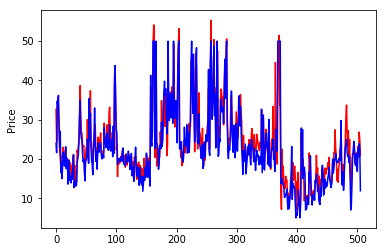

In [46]:
#Visualization
import matplotlib.pyplot as plt
plt.plot(indexes,ynew,color='red')
plt.plot(indexes,Y,color='blue')
plt.ylabel('Price')
plt.show()

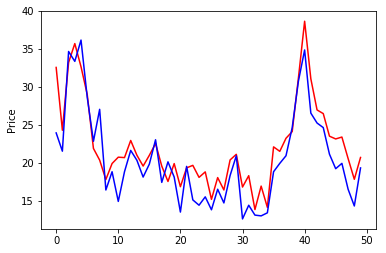

In [48]:
#Visualization
import matplotlib.pyplot as plt
plt.plot(indexes[0:50],ynew[0:50],color='red')
plt.plot(indexes[0:50],Y[0:50],color='blue')
plt.ylabel('Price')
plt.show()